In [1]:
# import the Pandas, Matplotlib, and NumPy dependencies in the first cell, and run the cell.

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
### 6.2.6 - Get the City Weather Data

import time

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        time.sleep(60)
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 1 | jacmel
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | manokwari
Processing Record 10 of Set 1 | rocha
Processing Record 11 of Set 1 | zyryanka
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | buala
Processing Record 15 of Set 1 | sorland
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | rawson
Processing Record 21 of Set 1 | azare
Processing R

Processing Record 39 of Set 4 | sawai madhopur
Processing Record 40 of Set 4 | dudinka
Processing Record 41 of Set 4 | tilichiki
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | halalo
City not found. Skipping...
Processing Record 44 of Set 4 | marica
Processing Record 45 of Set 4 | kalmunai
Processing Record 46 of Set 4 | lashio
Processing Record 47 of Set 4 | berlevag
Processing Record 48 of Set 4 | safwah
City not found. Skipping...
Processing Record 49 of Set 4 | loukhi
Processing Record 50 of Set 4 | baddomalhi
Processing Record 1 of Set 5 | matara
Processing Record 2 of Set 5 | udachnyy
Processing Record 3 of Set 5 | hollola
Processing Record 4 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 5 | wanning
Processing Record 6 of Set 5 | butaritari
Processing Record 7 of Set 5 | novopokrovka
Processing Record 8 of Set 5 | reidsville
Processing Record 9 of Set 5 | la rioja
Processing Record 10 of Set 5 | krasnoselkup
Processing

Processing Record 27 of Set 8 | valparaiso
Processing Record 28 of Set 8 | nadrag
Processing Record 29 of Set 8 | severnyy
Processing Record 30 of Set 8 | russell
Processing Record 31 of Set 8 | palmer
Processing Record 32 of Set 8 | nouadhibou
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | garissa
Processing Record 35 of Set 8 | ahuimanu
Processing Record 36 of Set 8 | aden
Processing Record 37 of Set 8 | tremedal
Processing Record 38 of Set 8 | talnakh
Processing Record 39 of Set 8 | galle
Processing Record 40 of Set 8 | phulabani
Processing Record 41 of Set 8 | poum
Processing Record 42 of Set 8 | bodden town
Processing Record 43 of Set 8 | nemuro
Processing Record 44 of Set 8 | salinopolis
Processing Record 45 of Set 8 | south bend
Processing Record 46 of Set 8 | freeport
Processing Record 47 of Set 8 | milkovo
Processing Record 48 of Set 8 | callaguip
Processing Record 49 of Set 8 | venkatagiri
Processing Record 50 of Set 8 | narrabri
Processing Record 1

Processing Record 18 of Set 12 | saint anthony
Processing Record 19 of Set 12 | zelenets
Processing Record 20 of Set 12 | maldonado
Processing Record 21 of Set 12 | teguise
Processing Record 22 of Set 12 | juneau
Processing Record 23 of Set 12 | nuristan
Processing Record 24 of Set 12 | pisco
Processing Record 25 of Set 12 | maryville
Processing Record 26 of Set 12 | brae
Processing Record 27 of Set 12 | tamandare
Processing Record 28 of Set 12 | miandrivazo
Processing Record 29 of Set 12 | mbandaka
Processing Record 30 of Set 12 | sfantu gheorghe
Processing Record 31 of Set 12 | orlik
Processing Record 32 of Set 12 | bowen
Processing Record 33 of Set 12 | hadishahr
Processing Record 34 of Set 12 | auki
Processing Record 35 of Set 12 | griffith
Processing Record 36 of Set 12 | port-cartier
Processing Record 37 of Set 12 | pizarro
Processing Record 38 of Set 12 | macusani
Processing Record 39 of Set 12 | omboue
Processing Record 40 of Set 12 | phan thiet
Processing Record 41 of Set 12 |

In [9]:
# tally the number of cities in the city_data array

len(city_data)

563

In [10]:
### 6.2.7 Create a DataFrame of City Weather Data

# convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,58.87,62,99,9.06,PT,2021-05-27 21:01:31
1,Vaini,-21.2000,-175.2000,74.37,64,4,8.21,TO,2021-05-27 21:01:31
2,New Norfolk,-42.7826,147.0587,43.57,75,53,3.89,AU,2021-05-27 21:01:32
3,Longyearbyen,78.2186,15.6401,30.04,64,40,17.27,SJ,2021-05-27 21:01:32
4,Port Alfred,-33.5906,26.8910,62.04,80,96,13.56,ZA,2021-05-27 21:01:32
5,Jacmel,18.2342,-72.5347,82.13,74,43,5.66,HT,2021-05-27 21:01:33
6,Jamestown,42.0970,-79.2353,69.08,53,91,4.00,US,2021-05-27 21:01:33
7,Manokwari,-0.8667,134.0833,78.53,76,39,3.67,ID,2021-05-27 21:01:33
8,Rocha,-34.4833,-54.3333,57.72,81,1,6.20,UY,2021-05-27 21:00:29
9,Zyryanka,65.7500,150.8500,57.33,44,54,17.09,RU,2021-05-27 21:01:34


In [11]:
# reorder the columns

new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lagoa,99,PT,2021-05-27 21:01:31,62,39.0500,-27.9833,58.87,9.06
1,Vaini,4,TO,2021-05-27 21:01:31,64,-21.2000,-175.2000,74.37,8.21
2,New Norfolk,53,AU,2021-05-27 21:01:32,75,-42.7826,147.0587,43.57,3.89
3,Longyearbyen,40,SJ,2021-05-27 21:01:32,64,78.2186,15.6401,30.04,17.27
4,Port Alfred,96,ZA,2021-05-27 21:01:32,80,-33.5906,26.8910,62.04,13.56
...,...,...,...,...,...,...,...,...,...
558,Bairiki,99,KI,2021-05-27 21:04:14,80,1.3292,172.9752,82.54,18.48
559,Haileybury,44,CA,2021-05-27 21:04:15,28,47.4490,-79.6373,50.61,11.01
560,Petauke,0,ZM,2021-05-27 21:04:15,63,-14.2426,31.3253,53.13,4.00
561,Mount Pleasant,40,US,2021-05-27 21:04:15,56,32.7941,-79.8626,94.30,1.01


In [14]:
# # Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lagoa,99,PT,2021-05-27 21:01:31,62,39.0500,-27.9833,58.87,9.06
1,Vaini,4,TO,2021-05-27 21:01:31,64,-21.2000,-175.2000,74.37,8.21
2,New Norfolk,53,AU,2021-05-27 21:01:32,75,-42.7826,147.0587,43.57,3.89
3,Longyearbyen,40,SJ,2021-05-27 21:01:32,64,78.2186,15.6401,30.04,17.27
4,Port Alfred,96,ZA,2021-05-27 21:01:32,80,-33.5906,26.8910,62.04,13.56


In [17]:
#### Unit 3 - Plot Weather Data
### 6.3.1 - Plot Latitude vs Temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

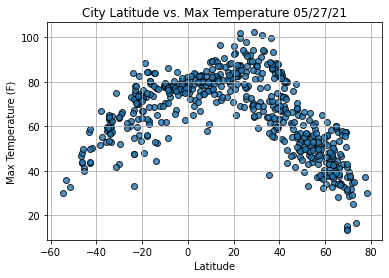

In [18]:
# Plot the data - we need the date at the top of the plot 

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

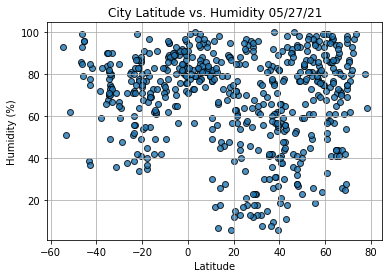

In [19]:
### 6.3.2 - Plot Latitude vs Humidity

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

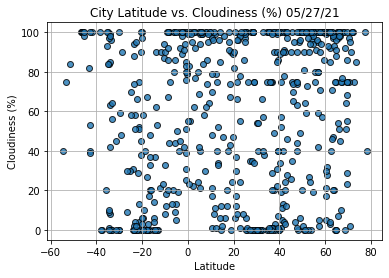

In [20]:
### 6.3.3 - Plot Latitude vs Cloudiness

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

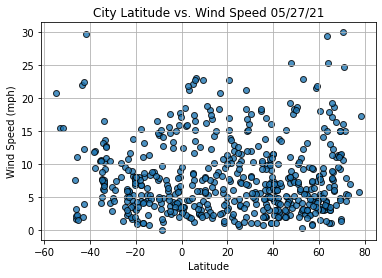

In [21]:
### 6.3.4 - Plot Latitude vs Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
#### Unit 4 - Determine Correlations
### 6.4.1: Use Linear Regression to Find the Relationship Between Variables

## Practice Using Linear Regression
